In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Task 1

#### a.

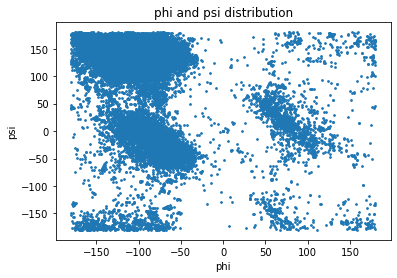

In [20]:
df = pd.read_csv('data_assignment3.csv')

# Scatter plot phi and psi values
plt.scatter(df['phi'], df['psi'], s=3)
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('phi and psi distribution')
plt.show()

#### b.

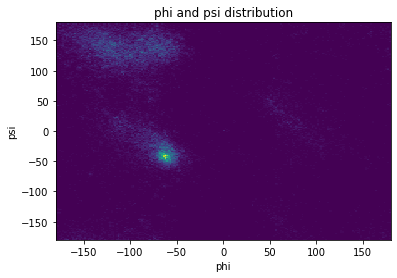

In [21]:
# Plot a 2d histogram of phi and psi values
plt.hist2d(df['phi'], df['psi'], bins=(200,200))
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('phi and psi distribution')
plt.show()

#### c.

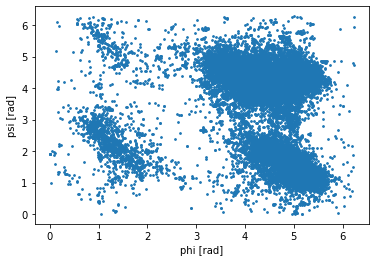

In [22]:
df['phi_wrapped'] = ((df['phi'].array) % 360) * np.pi/180
df['psi_wrapped'] = ((df['psi'].array + 110) % 360) * np.pi/180

# Create a scatter plot of the wrapped phi and psi angles
plt.scatter(df['phi_wrapped'], df['psi_wrapped'], s=3)

plt.xlabel('phi [rad]')
plt.ylabel('psi [rad]')

plt.show()

## Task 2

#### a.

In [23]:
from sklearn.cluster import KMeans

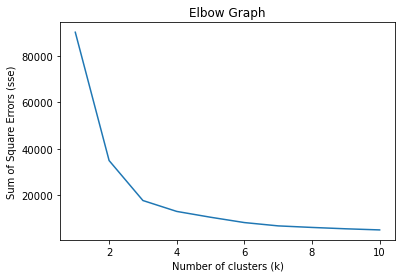

In [24]:
X = df[['phi_wrapped','psi_wrapped']].to_numpy()

# Find optimal value for k using elbow method, k_max is set to 10 as standard

def elbow_method(data, k_max=10):
    
    sse = [] # Store values for sum of squared errors (sse)
    
    # Implement kmeans clustering for different values for k and store their respective sse data
    for k in range(1,k_max+1):
        kmeans = KMeans(n_clusters=k).fit(data)
        sse.append(kmeans.inertia_)
        
    # Plot the elbow graph
    plt.plot(range(1, k_max+1), sse)
    plt.title('Elbow Graph')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Square Errors (sse)')
    plt.show()

elbow_method(X)   

Using the elbow method, it looks as if ´k=3´ gives us the best amount of clusters.

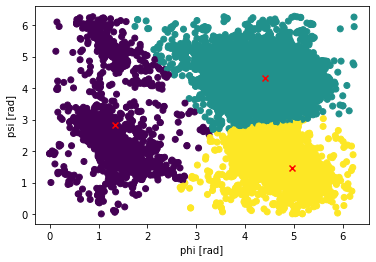

In [25]:
kmeans = KMeans(n_clusters=3, n_init=10)

label = kmeans.fit_predict(df[['phi_wrapped','psi_wrapped']])
 
#Plotting the results
plt.xlabel('phi [rad]')
plt.ylabel('psi [rad]')
plt.scatter(X[:,0] , X[:,1] , c=label)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.show()

# Task 3

#### b.

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
db = DBSCAN(eps=0.2, min_samples=24).fit(X) 
core_samples = np.zeros_like(db.labels_, dtype=bool)
core_samples[db.core_sample_indices_] = True
labels = db.labels_

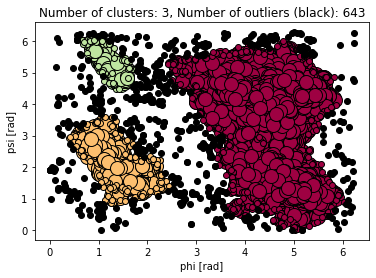

In [28]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
clusters = len(set(labels)) - (1 if -1 in labels else 0)
outliers = list(labels).count(-1)
plt.xlabel('phi [rad]')
plt.ylabel('psi [rad]')
plt.title(f'Number of clusters: {clusters}, Number of outliers (black): {outliers}')
plt.show()

#### c.

{'LYS': 22, 'PRO': 8, 'LEU': 15, 'TYR': 19, 'CYS': 0, 'SER': 53, 'ASN': 65, 'GLY': 244, 'HIS': 6, 'PHE': 4, 'ARG': 21, 'ILE': 10, 'ASP': 29, 'THR': 21, 'VAL': 21, 'GLN': 14, 'ALA': 51, 'GLU': 30, 'TRP': 5, 'MET': 5}


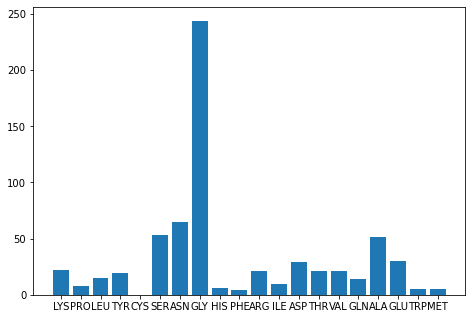

In [29]:
types = {}

for (i, name) in enumerate(df['residue name'].array):
    if name not in types: types[name] = 0
    if labels[i] == -1: types[name] += 1

print(types)
fig = plt.figure()
plt.xlabel('Amino acid residue types')
plt.ylabel('Number of outliers')
ax = fig.add_axes([0,0,1,1])
ax.bar(types.keys(), types.values())
plt.show()

# Task 4

In [30]:
phi_pro = []
psi_pro = []

# Only take into account amino acids that have residue type "PRO"
for i, name in enumerate(df['residue name'].array):
    if name == 'PRO':
        phi_pro.append(df['phi_wrapped'][i])
        psi_pro.append(df['psi_wrapped'][i])

# Create new dataframe
y = pd.DataFrame(list(zip(phi_pro, psi_pro)), columns =['phi_pro', 'psi_pro'])

In [59]:
db = DBSCAN(eps=0.25, min_samples=24).fit(y[['phi_pro', 'psi_pro']].values)
core_samples = np.zeros_like(db.labels_, dtype=bool)
core_samples[db.core_sample_indices_] = True
labels = db.labels_

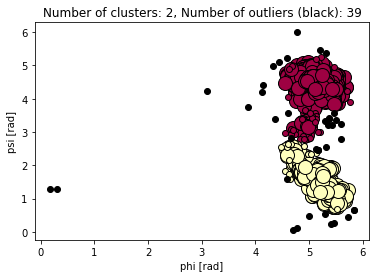

In [60]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = y[['phi_pro', 'psi_pro']].values[class_member_mask & core_samples]
    plt.plot(xy[:, 0].flatten(), xy[:, 1].flatten(), 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    xy = y[['phi_pro', 'psi_pro']].values[class_member_mask & ~core_samples]
    plt.plot(xy[:, 0].flatten(), xy[:, 1].flatten(), 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
clusters = len(set(labels)) - (1 if -1 in labels else 0)
outliers = list(labels).count(-1)
plt.xlabel('phi [rad]')
plt.ylabel('psi [rad]')
plt.title(f'Number of clusters: {clusters}, Number of outliers (black): {outliers}')
plt.show()

The clusters identified for PRO amino acid residues exhibit notable differences from the general clusters, with four estimated clusters as opposed to three clusters in Task 3b. The clusters look completely different. Additionally, the number of outliers has decreased substantially from 643 to 60.